For the task, we will require :


*   matplotlib.pyplot to plot the audio signals
*   numpy for basic operations
*   scipy.io.wavfile to read .wav file as a numpy array
*   scipy.linalg for performing

In [0]:
# Import packages.
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import linalg as LA

Now, let's define the following terms:  
1. Sampling Rate - Number of samples of audio present in one second.
2. uint8 - Unsigned Integers of 8 bits (0-255)

In [42]:
Sampling_rate, mixSignal1 = wavfile.read('mix1.wav')
print("Sampling rate = ", Sampling_rate)
print("Data type is ", mixSignal1.dtype)

Sampling rate =  8000
Data type is  uint8


Now, we Scale the audio data such that the amplitude lies betwen 0 and 1:

In [43]:
print(np.min(mixSignal1))
print(np.max(mixSignal1))
mixSignal1 = (mixSignal1-1.0)/(254.0-1.0)

1
254


In [44]:
print(mixSignal1.shape)

(50000,)


In [45]:
N = mixSignal1.shape[0]+0.0
print("Number of samples: ", N)

Number of samples:  50000.0


Now, Doing the same for signal 2:

In [47]:
Sampling_rate, mixSignal2 = wavfile.read('mix2.wav')
print("Sampling rate = ", Sampling_rate)
print("Data type is ", mixSignal1.dtype)
print(np.min(mixSignal2))
print(np.max(mixSignal2))
mixSignal2 = (mixSignal2-9.0)/(242.0-9.0)

Sampling rate =  8000
Data type is  float64
9
242


In [0]:
Data = [mixSignal1,mixSignal2]

Plotting The Mixed Signals

Text(0.5, 1.0, 'Original data')

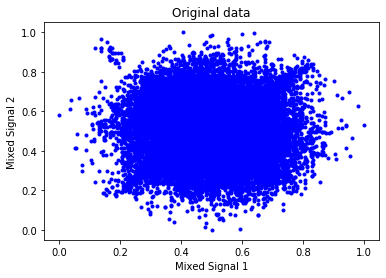

In [49]:
plt.figure()
plt.plot(Data[0],Data[1],'.b')
plt.ylabel('Mixed Signal 2')
plt.xlabel('Mixed Signal 1')
plt.title("Original data")

In [0]:
# Calculate the covariance matrix of the initial data.
Covariance = np.cov(Data)
# Calculate eigenvalues and eigenvectors of the covariance matrix.
Eval, Evect = LA.eigh(Covariance)
# Generate a diagonal matrix with the eigenvalues as diagonal elements.
EMat = np.diag(Eval)

P = LA.sqrtm(LA.inv(EMat))
# Perform whitening. whitMat is the whitened matrix.
whitMat = np.dot(P, np.dot(np.transpose(Evect), Data))

Now we will plot the Whitened Data to show the new structure of the data:

Text(0.5, 1.0, 'Whitened data')

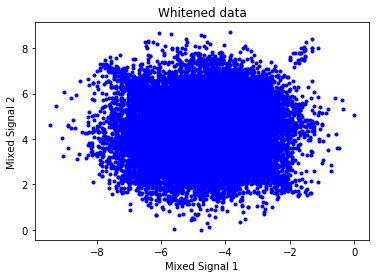

In [51]:
plt.figure()
plt.plot(whitMat[0], whitMat[1], '.b')
plt.ylabel('Mixed Signal 2')
plt.xlabel('Mixed Signal 1')
plt.title("Whitened data")

5
248
34
249


Text(0.5, 1.0, 'Original signal 2')

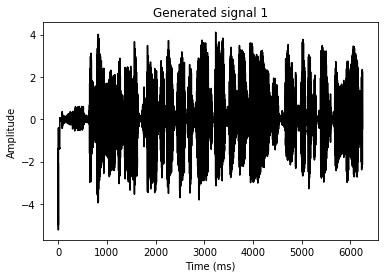

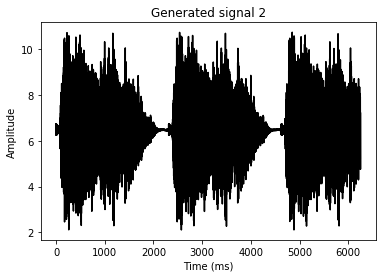

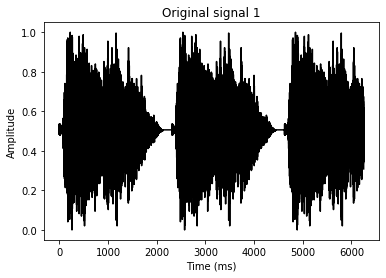

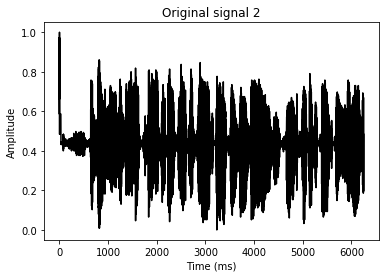

In [52]:
# Perform FOBI.
norm_whitMat = LA.norm(whitMat, axis=0)
norm = [norm_whitMat, norm_whitMat]

cov2 = np.cov(np.multiply(norm, whitMat))

d_n, Y = LA.eigh(cov2)

source = np.dot(np.transpose(Y), whitMat)

# Plot the separated sources.
time = np.arange(0, N, 1)
time = time / Sampling_rate
time = time * 1000  # convert to milliseconds

plt.figure()
plt.plot(time, source[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

plt.figure()
plt.plot(time, source[1], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")

# Plot the actual sources for comparison.
samplingRate, orig1 = wavfile.read('source1.wav')
print(np.min(orig1))
print(np.max(orig1))
orig1 = (orig1-5.0)/(248.0 -5.0) # uint8 takes values from 0 to 255

plt.figure()
plt.plot(time, orig1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 1")

samplingRate, orig2 = wavfile.read('source2.wav')
print(np.min(orig2))
print(np.max(orig2))
orig2 = (orig2-34.0)/(249.0 -34.0) # uint8 takes values from 0 to 255

plt.figure()
plt.plot(time, orig2, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 2")